In [ ]:
!ffmpeg -i samples/f%04d.png  -c:v libx264 -pix_fmt yuv420p  samples.mp4

# StyleGAN2: hi-res generative modeling

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/stylegan2.ipynb)

StyleGAN2 is a generative model architecture which generates state-of-the-art, high-resolution images. This module is based on the [original code](https://github.com/NVlabs/stylegan2) and [paper](https://arxiv.org/abs/1912.04958) by NVIDIA, and comes with several pre-trained models, as well as functions for sampling from the GAN, generating interpolations, and performing operations on the latent space to achieve style-transfer like effects.

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Load stylegan 

You can see what pre-trained models are available with `stylegan2.get_pretrained_models`.

In [1]:
from ml4a import image
from ml4a.models import stylegan3

stylegan3.get_pretrained_models()

dict_keys(['ffhq-t', 'ffhq-r', 'ffhqu-t', 'ffhqu-r', 'metfaces-t', 'metfaces-r', 'afhqv2-t', 'afhqv2-r'])

The variable `network_pkl` refers to the location of the trained pkl file. You can load your own pkl locally from your computer, or get one of the pretrained models listed above.

In [2]:
network_pkl = stylegan3.get_pretrained_model('ffhqu-t')
#network_pkl = 'network-snapshot-001120.pkl'
stylegan3.load_model(network_pkl)

## Generate random samples

`stylegan2.random_sample(n)` will generate `n` random images from the latent space of your trained model. If your model is conditional, you must also supply a label vector.

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


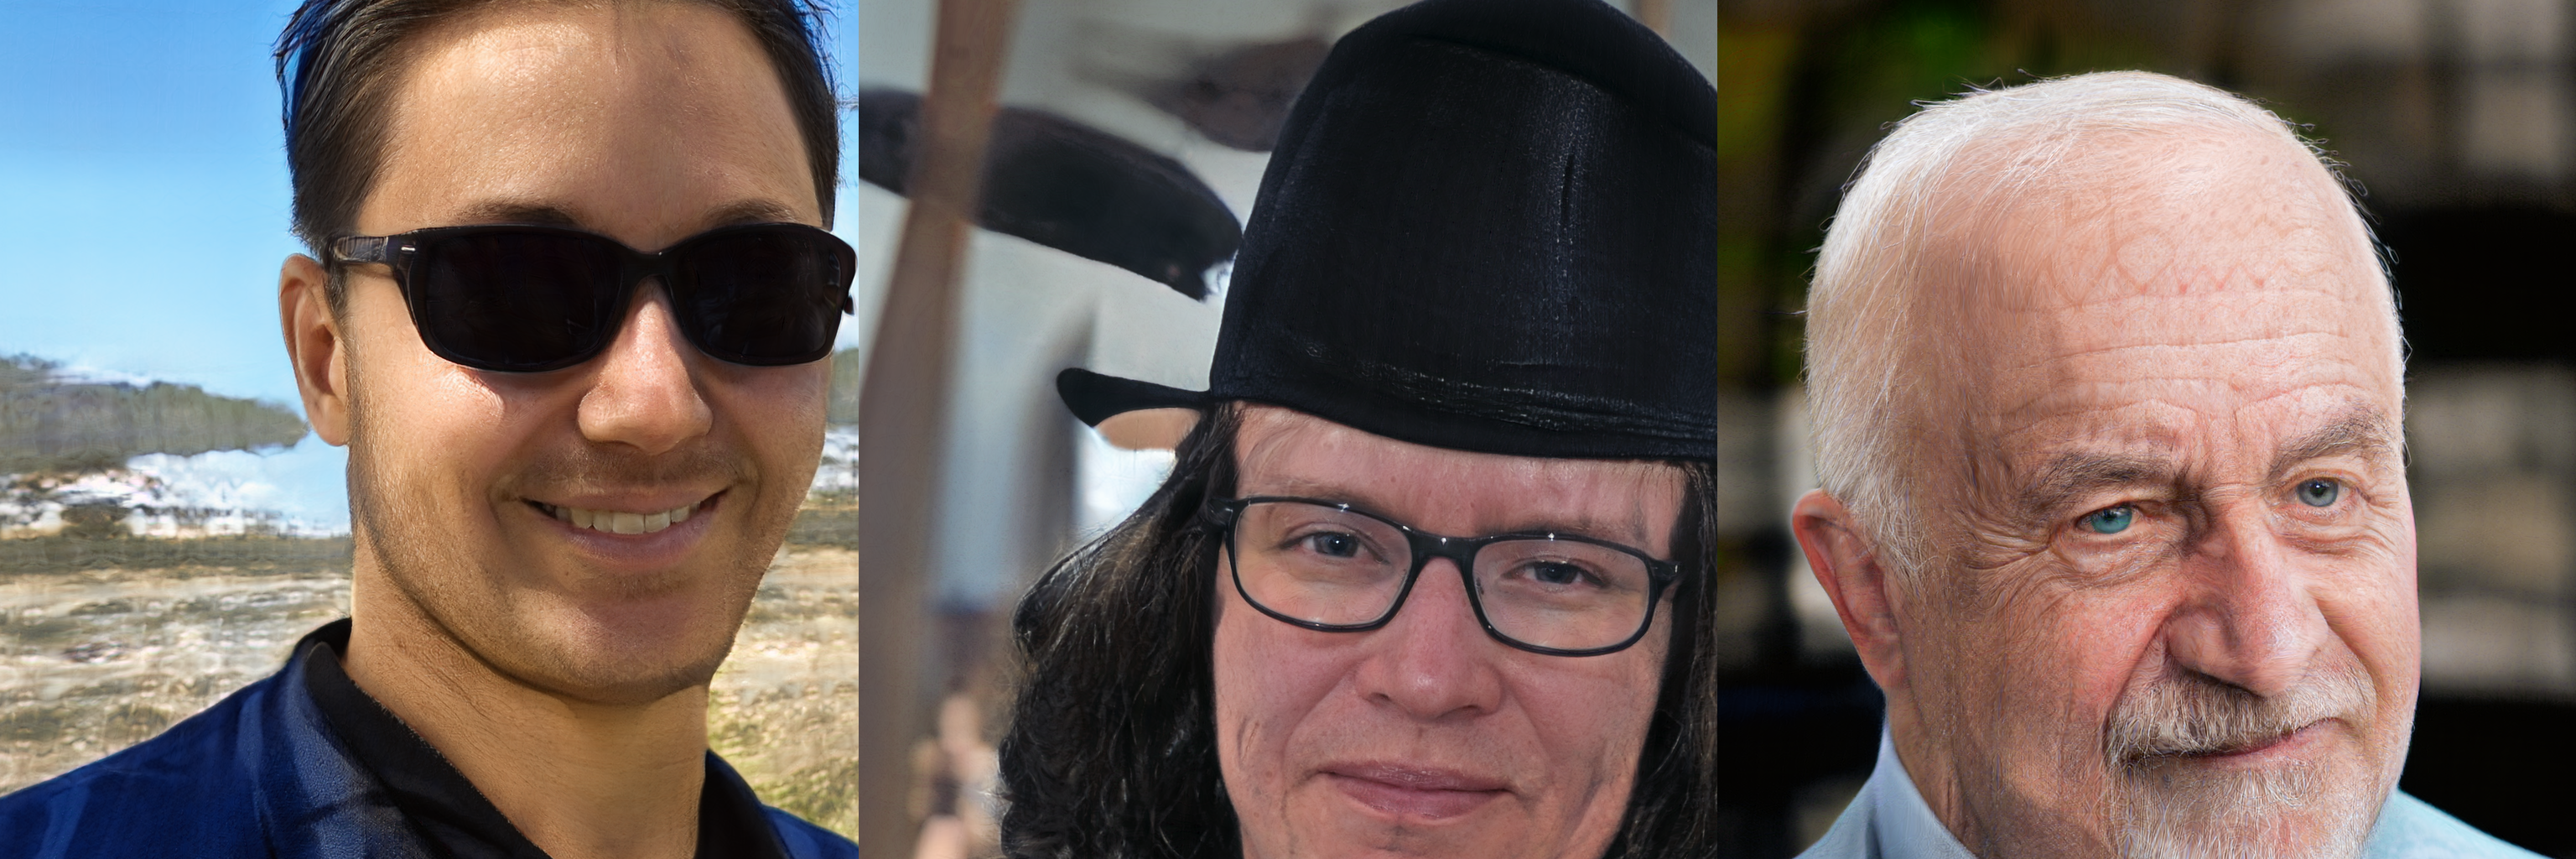

In [3]:
samples, _ = stylegan3.random_sample(3, label=None, truncation=1.0)
image.display(samples)

You can quickly generate a "latent walk" video, a random interpolation through the latent space of your model of `duration_sec` seconds long, with `stylegan2.generate_interpolation_video`.

In [4]:
latent_video = stylegan3.generate_interpolation_video2(
    'latent_interpolation.mp4', 
    labels=None,
    truncation=1, 
    duration_sec=25.0,
    smoothing_sec=5.0
)

Moviepy - Building video latent_interpolation.mp4.
Moviepy - Writing video latent_interpolation.mp4



Moviepy - Done !
Moviepy - video ready latent_interpolation.mp4


Display the generated video inline in the notebook.

In [2]:
image.display_local(latent_video)